In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
df = pd.read_csv("epa-sea-level.csv")

In [55]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


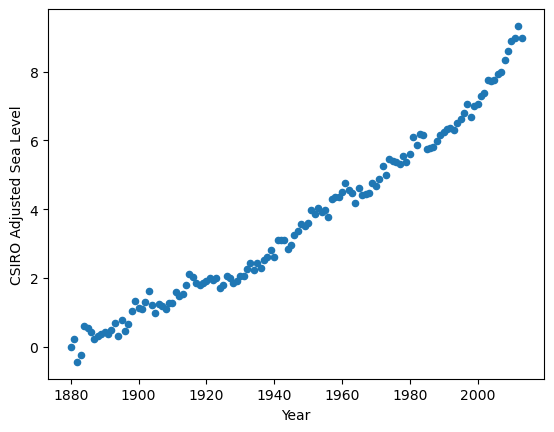

In [56]:
df.plot('Year', 'CSIRO Adjusted Sea Level', kind='scatter')
plt.show()
fig.savefig('sea_level_plot2.png')

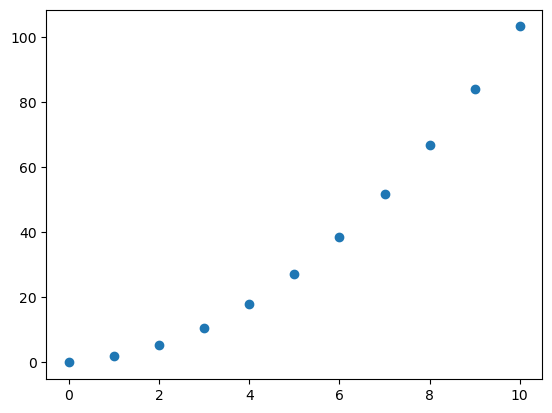

In [57]:
x = np.arange(0, 11)
plt.scatter(x, x**(1/2) + x**2)
plt.show()
fig.savefig('sea_level_plot5.png')

In [58]:
df_amount = len(df)
t0 = 0
t1 = 0
t2 = 0
learning_rate = 0.0000005


for i in range(df_amount):
    t0 = t0 - learning_rate * (1/df_amount) * (t0 + t1 * ((df.index[i])**(1/2)) + t2 * ((df.index[i])**(2)) - df['CSIRO Adjusted Sea Level'][i] )
    t1 = t1 - learning_rate * (1/df_amount) * (t0 * ((df.index[i])**(1/2)) + t1 * (df.index[i]) + t2 * ((df.index[i])**(5/2)) - ((df.index[i])**(1/2)) * (df['CSIRO Adjusted Sea Level'][i]) )
    t2 = t2 - learning_rate * (1/df_amount) * (t0 * ((df.index[i])**(2)) + t1 * ((df.index[i])**(5/2)) + t2 * ((df.index[i])**(4)) - ((df.index[i])**(2)) * (df['CSIRO Adjusted Sea Level'][i]) )
    
print(t0)
print(t1)
print(t2)

2.975511852604945e-07
1.8364352498689886e-06
0.0005027535708534357


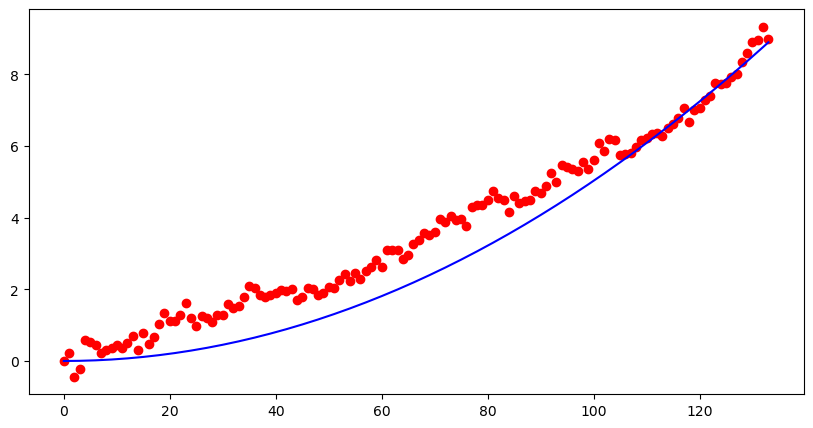

In [59]:
x = np.arange(0, df_amount)

fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(x, t0  + t1*(x**(1/2)) + t2*(x**2), c = 'blue')
ax.scatter(x, df['CSIRO Adjusted Sea Level'], c = 'red')
plt.show()
fig.savefig('sea_level_plot1.png')

In [60]:
print(t0  + t1*(169**(1/2)) + t2*(169**2))

14.35916890835441


In [61]:
def sum_training_set_t0(theta0, theta1, theta2):
    
    df_size = len(df)
    sum_value = 0
    
    for i in range(df_size):
        sum_value += (theta0 + theta1 * ((df.index[i])**(1/2)) + theta2 * ((df.index[i])**(2)) - df['CSIRO Adjusted Sea Level'][i] )
        
    return sum_value

In [62]:
def sum_training_set_t1(theta0, theta1, theta2):
    
    df_size = len(df)
    sum_value = 0
    
    for i in range(df_size):
        sum_value += (theta0 * ((df.index[i])**(1/2)) + theta1 * (df.index[i]) + theta2 * ((df.index[i])**(5/2)) - ((df.index[i])**(1/2)) * (df['CSIRO Adjusted Sea Level'][i]) )
        
    return sum_value

In [63]:
def sum_training_set_t2(theta0, theta1, theta2):
    
    df_size = len(df)
    sum_value = 0
    
    for i in range(df_size):
        sum_value += (theta0 * ((df.index[i])**(2)) + theta1 * ((df.index[i])**(5/2)) + theta2 * ((df.index[i])**(4)) - ((df.index[i])**(2)) * (df['CSIRO Adjusted Sea Level'][i]) )
        
    return sum_value

In [64]:
df_amount = len(df)
t0 = 0
t1 = 0
t2 = 0
learning_rate = 0.000000000003


for i in range(1000):
    t0 = t0 - learning_rate * sum_training_set_t0(t0, t1, t2)
    t1 = t1 - learning_rate * sum_training_set_t1(t0, t1, t2)
    t2 = t2 - learning_rate * sum_training_set_t2(t0, t1, t2)
    
print(t0)
print(t1)
print(t2)

2.1770071705801734e-07
1.4671196005817181e-06
0.0005467569870868304


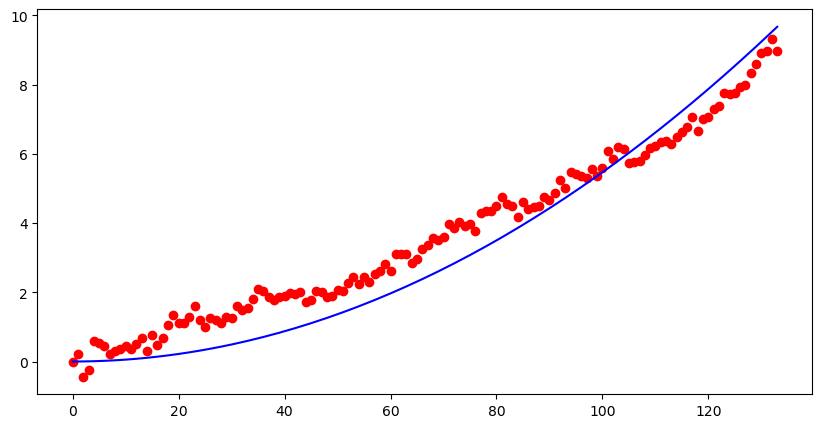

In [65]:
x = np.arange(0, df_amount)

fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(x, t0  + t1*(x**(1/2)) + t2*(x**2), c = 'blue')
ax.scatter(x, df['CSIRO Adjusted Sea Level'], c = 'red')
plt.show()
fig.savefig('sea_level_plot2.png')

In [66]:
print(t0  + t1*(169**(1/2)) + t2*(169**2))

15.615945598442487


In [67]:
df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [68]:
def sum_through_data_locally_weighted_t0(M, X, T0, T1, xi, yi, U):
    import math
    s = 0
    for i in range(M):
        s += math.e**( (-(xi[i] - X)**2) / 2*(u**2) ) * (t0 + t1*xi[i] - yi[i] )
    
    return s

In [69]:
def sum_through_data_locally_weighted_t1(M, X, T0, T1, xi, yi, U):
    import math
    s = 0
    for i in range(M):
        s += xi[i] * (math.e**( (-(xi[i] - X)**2) / 2*(u**2) )) * (t0 + t1*xi[i] - yi[i] )
    
    return s

In [70]:
m = len(df)
t0 = 0
t1 = 0
u = 0.101
lr = 0.01
x = 169  # 2050 would be the 169th index.
    
for i in range(1000):
    t0 = t0 - lr * (1/m) * sum_through_data_locally_weighted_t0(m, x, t0, t1, df.index.values, df['CSIRO Adjusted Sea Level'], u)
    t1 = t1 - lr * (1/m) * sum_through_data_locally_weighted_t1(m, x, t0, t1, df.index.values, df['CSIRO Adjusted Sea Level'], u)

print(t0)
print(t1)


0.0005146450372530865
0.0675919410265953


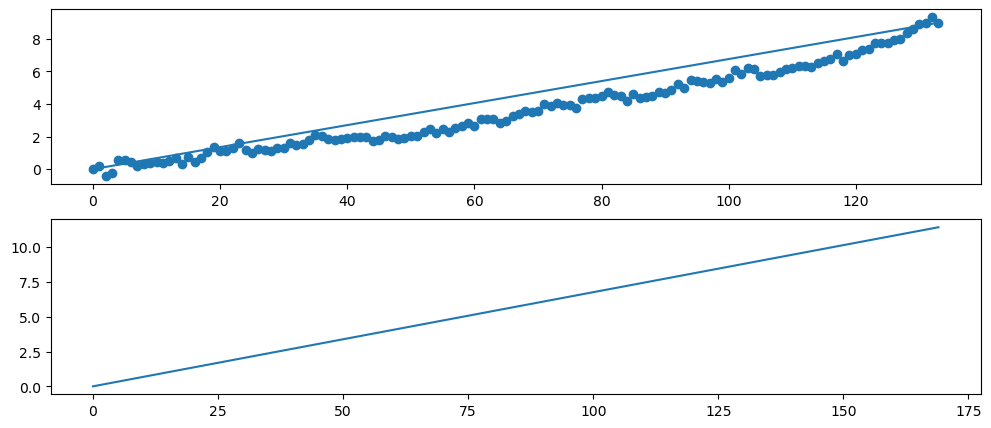

In [71]:
fig, ax = plt.subplots(2, 1, figsize = (12, 5))
x = range(170)

ax[0].scatter(df.index.values, df['CSIRO Adjusted Sea Level'])
ax[0].plot(df.index.values, t0 + t1*(df.index.values))
ax[1].plot(x, t0 + t1*x)
fig.savefig('sea_level_plot3.png')

In [72]:
t0 + t1*169

11.423552678531859

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
mod = LinearRegression()

In [75]:
df['Year'].shape


(134,)

In [76]:
X = np.array(df['Year'])


In [77]:
type(X)

numpy.ndarray

In [78]:
X = X.reshape(-1, 1)

In [79]:
X.shape

(134, 1)

In [80]:
X.ndim


2

In [81]:
mod.fit(X, df['CSIRO Adjusted Sea Level'])

LinearRegression()

In [82]:
np.arange(2014, 2051)

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024,
       2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035,
       2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046,
       2047, 2048, 2049, 2050])

In [83]:
X_prediction = np.append(X, values=np.arange(2014, 2051))

In [84]:
X_prediction

array([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901,
       1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024, 2025, 2026, 2027, 2028, 2029, 20

In [85]:
X_prediction = X_prediction.reshape(-1, 1)

In [86]:
mod.predict(X_prediction)

array([-0.54212402, -0.47907944, -0.41603486, -0.35299027, -0.28994569,
       -0.2269011 , -0.16385652, -0.10081194, -0.03776735,  0.02527723,
        0.08832182,  0.1513664 ,  0.21441098,  0.27745557,  0.34050015,
        0.40354474,  0.46658932,  0.5296339 ,  0.59267849,  0.65572307,
        0.71876766,  0.78181224,  0.84485682,  0.90790141,  0.97094599,
        1.03399058,  1.09703516,  1.16007974,  1.22312433,  1.28616891,
        1.3492135 ,  1.41225808,  1.47530266,  1.53834725,  1.60139183,
        1.66443642,  1.727481  ,  1.79052558,  1.85357017,  1.91661475,
        1.97965934,  2.04270392,  2.1057485 ,  2.16879309,  2.23183767,
        2.29488226,  2.35792684,  2.42097142,  2.48401601,  2.54706059,
        2.61010518,  2.67314976,  2.73619434,  2.79923893,  2.86228351,
        2.9253281 ,  2.98837268,  3.05141726,  3.11446185,  3.17750643,
        3.24055102,  3.3035956 ,  3.36664018,  3.42968477,  3.49272935,
        3.55577394,  3.61881852,  3.6818631 ,  3.74490769,  3.80

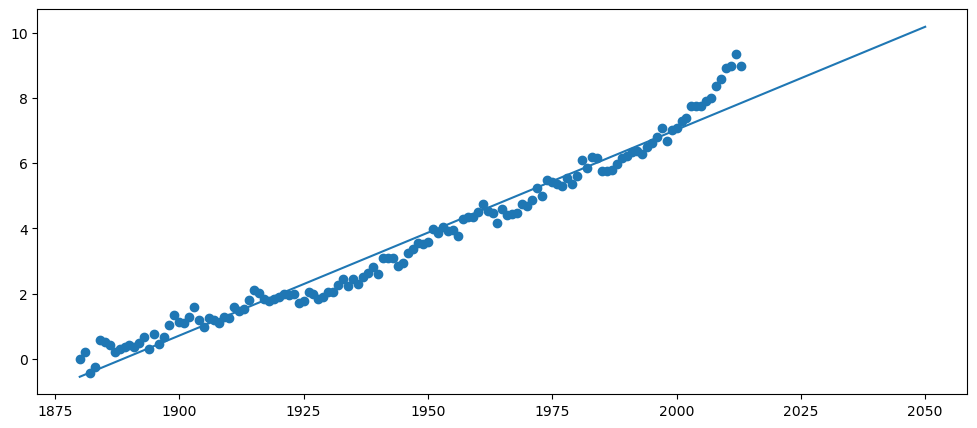

In [87]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(X_prediction, mod.predict(X_prediction))
ax.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [89]:
df = pd.read_csv('epa-sea-level.csv')
df
plt.show()
fig.savefig('sea_level_plot7.png')

In [90]:
x = df['Year']
x


0      1880
1      1881
2      1882
3      1883
4      1884
       ... 
129    2009
130    2010
131    2011
132    2012
133    2013
Name: Year, Length: 134, dtype: int64

In [91]:
y = df['CSIRO Adjusted Sea Level']
y


0      0.000000
1      0.220472
2     -0.440945
3     -0.232283
4      0.590551
         ...   
129    8.586614
130    8.901575
131    8.964567
132    9.326772
133    8.980315
Name: CSIRO Adjusted Sea Level, Length: 134, dtype: float64

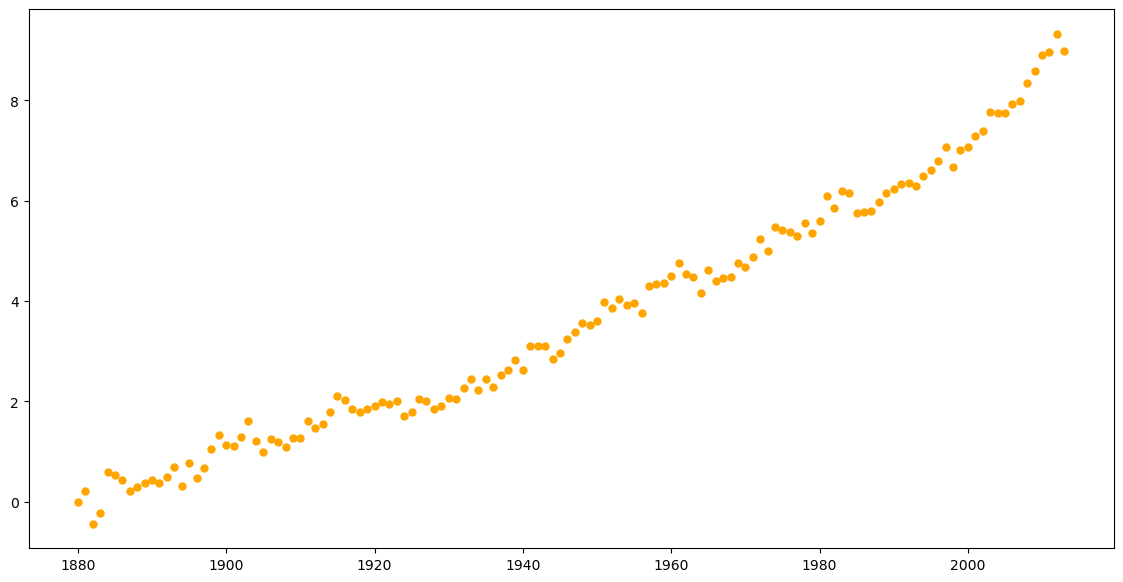

In [92]:
# Figure size:
fig, ax = plt.subplots(figsize=(14, 7))

# Scatter plot with 'x' and 'y' points: 
ax.scatter(x, y, color='orange', s=25)  # 'ax.scatter()' = 'plt.scatter()'

# NOTES:
# See https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

In [93]:
# Linear regression line (years 1880 to 2050);
res_1 = linregress(x, y)
x_pred = pd.Series(i for i in range(1880, 2051))
y_pred = res_1.slope * x_pred + res_1.intercept  # m = i*a + b

ax.plot(x_pred, y_pred, 'r', linewidth=2) # 'ax.plot()' = 'plt.plot()'

# Everything in the same figure ('fig'):
#    . Scatter plot ('ax.scatter(x,y)')
#    . First linear regression line ('ax.plot()' / years 1880 to 2050)
fig
fig.savefig('sea_level_plot6.png')

In [94]:
df_2000_2050 = df.copy()
df_2000_2050

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


In [95]:
df_2000_2050 = df.loc[df_2000_2050['Year'] >= 2000]
df_2000_2050

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
120,2000,7.062992,6.791339,7.334646,6.920582
121,2001,7.287402,7.019685,7.555118,7.087460
122,2002,7.381890,7.110236,7.653543,7.319698
123,2003,7.759843,7.484252,8.035433,7.488353
124,2004,7.740157,7.464567,8.015748,7.507933
125,2005,7.744094,7.472441,8.015748,7.644563
126,2006,7.917323,7.645669,8.188976,7.697420
127,2007,7.996063,7.712598,8.279528,7.702147
128,2008,8.350394,8.078740,8.622047,7.907365
129,2009,8.586614,8.311024,8.862205,8.046354


In [96]:
x_2000_2050 = df_2000_2050['Year']
x_2000_2050

120    2000
121    2001
122    2002
123    2003
124    2004
125    2005
126    2006
127    2007
128    2008
129    2009
130    2010
131    2011
132    2012
133    2013
Name: Year, dtype: int64

In [97]:
y_2000_2050 = df_2000_2050['CSIRO Adjusted Sea Level']
y_2000_2050


120    7.062992
121    7.287402
122    7.381890
123    7.759843
124    7.740157
125    7.744094
126    7.917323
127    7.996063
128    8.350394
129    8.586614
130    8.901575
131    8.964567
132    9.326772
133    8.980315
Name: CSIRO Adjusted Sea Level, dtype: float64

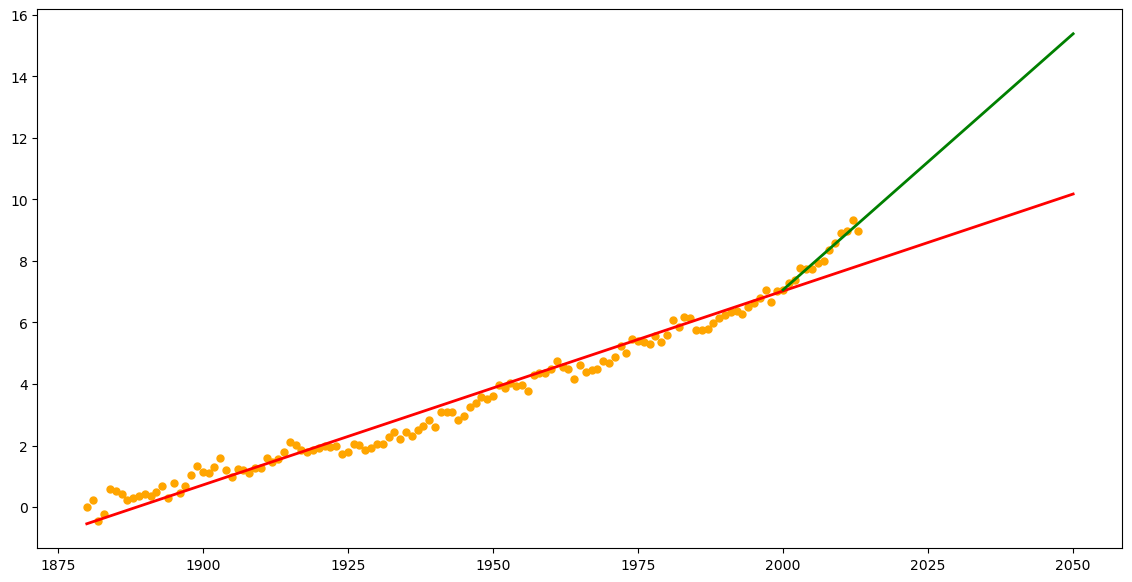

In [98]:
# Linear regression line (years 2000 to 2050);
res_2 = linregress(x_2000_2050, y_2000_2050)
x_pred_2000_2050 = pd.Series(i for i in range(2000, 2051))
y_pred_2000_2050 = res_2.slope * x_pred_2000_2050 + res_2.intercept  # m = i*a + b

ax.plot(x_pred_2000_2050, y_pred_2000_2050, 'g', linewidth=2) # 'ax.plot()' = 'plt.plot()'

# Everything in the same figure ('fig'):
#    . Scatter plot ('ax.scatter(x,y)')
#    . First linear regression line ('ax.plot()' / years 1880 to 2050)
#    . Second linear regression line ('ax.plot()' / years 2000 to 2050)
fig


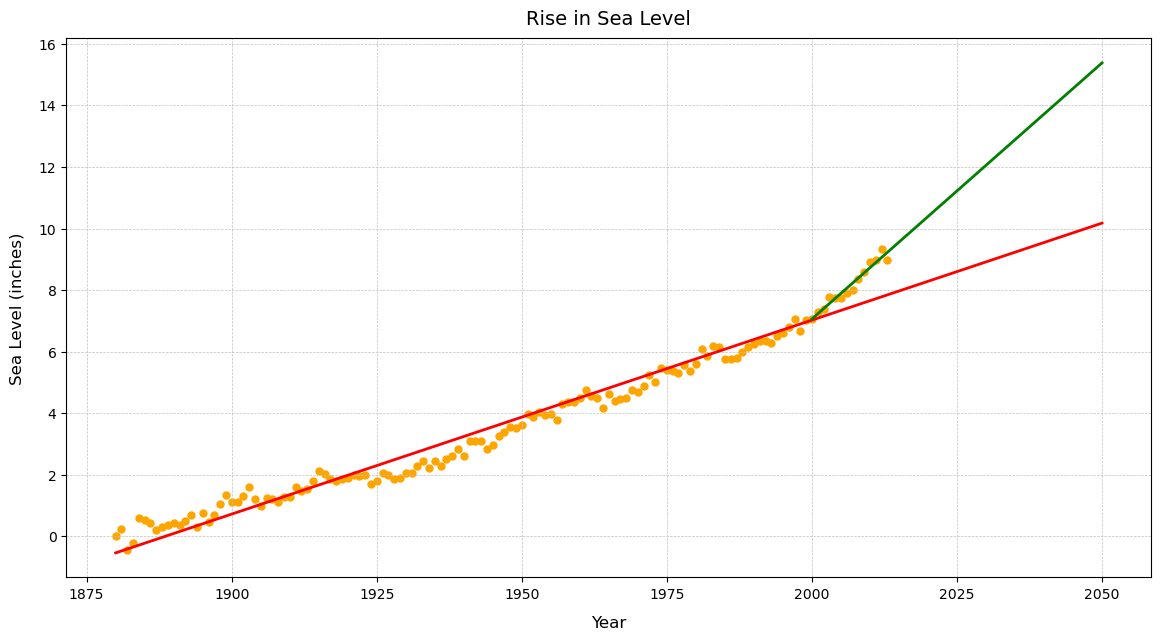

In [99]:
# Setting figure ('fig') layout:
#   . Title
#   . Xlabels
#   . Ylabels
#   . Grid
ax.set_title('Rise in Sea Level', pad=10.0, fontsize=14)
ax.set_xlabel('Year', labelpad=10.0, fontsize=12)
ax.set_ylabel('Sea Level (inches)', labelpad=10.0, fontsize=12)
ax.grid(True, color='#c0c0c0', linestyle='--', linewidth=0.5)
   
    
# Everything in the same figure ('fig'):
#    . Scatter plot ('ax.scatter(x,y)')
#    . First linear regression line ('ax.plot()' / years 1880 to 2050)
#    . Second linear regression line ('ax.plot()' / years 2000 to 2050)
#    . fig (Chart) layout
fig


In [100]:
fig.savefig('sea_level_plot.png')